Começando importando a biblioteca e o arquivo csv

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


urlDados = 'https://raw.githubusercontent.com/elasComputacao/raio-x-dados/main/data/dados-brutos/historico_alunos_raiox.csv'

dados = pd.read_csv(urlDados)



Agora quero saber quais são todas as colunas presentes no df e selecionar apenas as que tem algo a ver com as optativas gerais e sua taxa de aprovação

In [ ]:
dados.columns

Index(['id', 'codigo_curriculo', 'codigo_ingresso', 'periodo_ingresso',
       'forma_ingresso', 'codigo_evasao', 'forma_evasao', 'periodo_evasao',
       'evadiu_periodo', 'forma_saida', 'acao_afirmativa',
       'tipo_reserva_vagas', 'forma_reserva_vagas', 'sexo', 'codigo_cor',
       'nome_cor', 'idade_ingresso', 'idade_evasao', 'tipo_ensino_medio',
       'ensino_medio', 'apv_media_geral', 'codigo_disciplina',
       'periodo_matricula', 'turma', 'codigo_tipo_matricula', 'tipo_matricula',
       'codigo_situacao', 'situacao', 'media_final', 'nome_disciplina',
       'numero_creditos', 'carga_horaria', 'nome_setor', 'periodo_relativo'],
      dtype='object')

Cadeiras optativas gerais de acordo com a ementa disponivel em https://www.computacao.ufcg.edu.br/graduacao/plano-de-curso

* FÍSICA GERAL I
* FÍSICA GERAL II
* FÍSICA GERAL III,
*FÍSICA GERAL IV
* ÁLGEBRA VETORIAL E GEOMETRIA ANALÍTICA
* CÁLCULO DIFERENCIAL E INTEGRAL III
* ADMINISTRAÇÃO E EMPREENDEDORISMO
* ECONOMIA, DIREITO E CIDADANIA
* INGLÊS
* LÍNGUA PORTUGUESA
* LIBRAS
* INFORMÁTICA E SOCIEDADE

agora vou criar uma lista com o nome de todas as optativas gerais, e usar o iloc para filtrar o df apenas pelo nome da disciplina e situação

In [ ]:
nome_optativas = ['FÍSICA GERAL I', 'FÍSICA GERAL II', 'FÍSICA GERAL III', 'FÍSICA GERAL IV', 'ALGEBRA VETORIAL E GEOMETRIA ANALÍTICA', 'CALCULO DIFERENCIAL E INTEGRAL III', 'ADMINISTRACAO E EMPREENDEDORISMO', 'ECONOMIA', 'DIREITO E CIDADANIA', 'INGLÊS', 'LINGUA PORTUGUESA', 'LIBRAS', 'INFORMÁTICA E SOCIEDADE']

only_optativas = dados.iloc[:][['nome_disciplina', 'situacao']]
only_optativas

,nome_disciplina,situacao
0,ALGEBRA VETORIAL E GEOMETRIA ANALÍTICA,Aprovado
1,ECONOMIA,Aprovado
2,SOCIOLOGIA INDUSTRIAL I,Aprovado
3,INTRODUÇÃO À PSICOLOGIA,Trancado
4,INTRODUÇÃO À PSICOLOGIA,Aprovado
...,...,...
150698,PRINCIPIOS DE DESENVOLVIMENTO WEB,Em Curso
150699,TECC(PROJETO DE SISTEMAS OPERACIONAIS),Aprovado
150700,PRATICA DE ENSINO DE COMPUTACAO I,Aprovado
150701,DESENV. DE APLICACOES CORP. AVANCADAS,Aprovado


In [ ]:
only_optativas.situacao.unique()

array(['Aprovado', 'Trancado', 'Reprovado', 'Reprovado por Falta', nan,
       'Compareceu ao Exame Nacional', 'Dispensado', 'Participante',
       'Em Curso', 'Cancelado'], dtype=object)

vou criar um dicionario vazio para guardar a disciplina como chave e um df com os dados de alunos e aprovação dela

In [ ]:
optativas_dict = {}

optativas_dict = {disciplina: only_optativas.loc[only_optativas.nome_disciplina == disciplina] for disciplina in nome_optativas}

In [ ]:
optativas_dict

{'FÍSICA GERAL I':        nome_disciplina  situacao
 906     FÍSICA GERAL I  Aprovado
 954     FÍSICA GERAL I  Aprovado
 1002    FÍSICA GERAL I  Aprovado
 1056    FÍSICA GERAL I  Trancado
 1057    FÍSICA GERAL I  Aprovado
 ...                ...       ...
 143820  FÍSICA GERAL I  Aprovado
 144309  FÍSICA GERAL I  Aprovado
 144320  FÍSICA GERAL I  Aprovado
 144828  FÍSICA GERAL I  Aprovado
 146669  FÍSICA GERAL I  Aprovado
 
 [659 rows x 2 columns],
 'FÍSICA GERAL II':         nome_disciplina  situacao
 910     FÍSICA GERAL II  Aprovado
 958     FÍSICA GERAL II  Aprovado
 1008    FÍSICA GERAL II  Trancado
 1009    FÍSICA GERAL II  Aprovado
 1061    FÍSICA GERAL II  Aprovado
 ...                 ...       ...
 140903  FÍSICA GERAL II  Aprovado
 143827  FÍSICA GERAL II  Aprovado
 144314  FÍSICA GERAL II  Aprovado
 144831  FÍSICA GERAL II  Aprovado
 146672  FÍSICA GERAL II  Aprovado
 
 [527 rows x 2 columns],
 'FÍSICA GERAL III':          nome_disciplina  situacao
 908     FÍSICA GERAL III

vou criar um dicionario para armazenar por disciplina: o numero de matriculados, numero de aprovados, numero de reprovados(por falta e nao) e a taxa de aprovacao (%)

In [ ]:
taxa_aprovacao_dict = {}

#for para varrer o dicionario de df em df
for disciplina, df in optativas_dict.items():

  #variavel que pega a quantidade de linhas do df de cada disciplina
  total_alunos = optativas_dict[disciplina].shape[0]

  #variavel que pega o numero de aprovados no df filtrado
  aprovados = optativas_dict[disciplina][optativas_dict[disciplina]['situacao'] == 'Aprovado'].shape[0]

  #calcular a quantidade de reprovados
  reprovados = optativas_dict[disciplina][optativas_dict[disciplina]['situacao'].isin(['Reprovado', 'Reprovado por Falta'])].shape[0]

  #variavel que calcula a taxa de aprovacao
  taxa_aprovacao = round((aprovados / total_alunos) * 100 if total_alunos > 0 else 0, 2)

  #variavel que calcula a taxa de reprovacao
  taxa_reprovacao = round((reprovados / total_alunos) * 100 if total_alunos > 0 else 0, 2)

  #colocando tudo no dicionario
  taxa_aprovacao_dict[disciplina] = [total_alunos, aprovados,reprovados, taxa_aprovacao, taxa_reprovacao]

mostrando o dicionario

In [ ]:
taxa_aprovacao_dict

{'FÍSICA GERAL I': [659, 512, 104, 77.69, 15.78],
 'FÍSICA GERAL II': [527, 439, 51, 83.3, 9.68],
 'FÍSICA GERAL III': [669, 554, 56, 82.81, 8.37],
 'FÍSICA GERAL IV': [83, 78, 4, 93.98, 4.82],
 'ALGEBRA VETORIAL E GEOMETRIA ANALÍTICA': [4536, 2718, 1654, 59.92, 36.46],
 'CALCULO DIFERENCIAL E INTEGRAL III': [619, 440, 126, 71.08, 20.36],
 'ADMINISTRACAO E EMPREENDEDORISMO': [97, 52, 10, 53.61, 10.31],
 'ECONOMIA': [1737, 1285, 325, 73.98, 18.71],
 'DIREITO E CIDADANIA': [1795, 1576, 135, 87.8, 7.52],
 'INGLÊS': [792, 701, 53, 88.51, 6.69],
 'LINGUA PORTUGUESA': [1792, 1508, 129, 84.15, 7.2],
 'LIBRAS': [5, 5, 0, 100.0, 0.0],
 'INFORMÁTICA E SOCIEDADE': [1746, 1558, 137, 89.23, 7.85]}

Gerando um grafico com esse dicionario

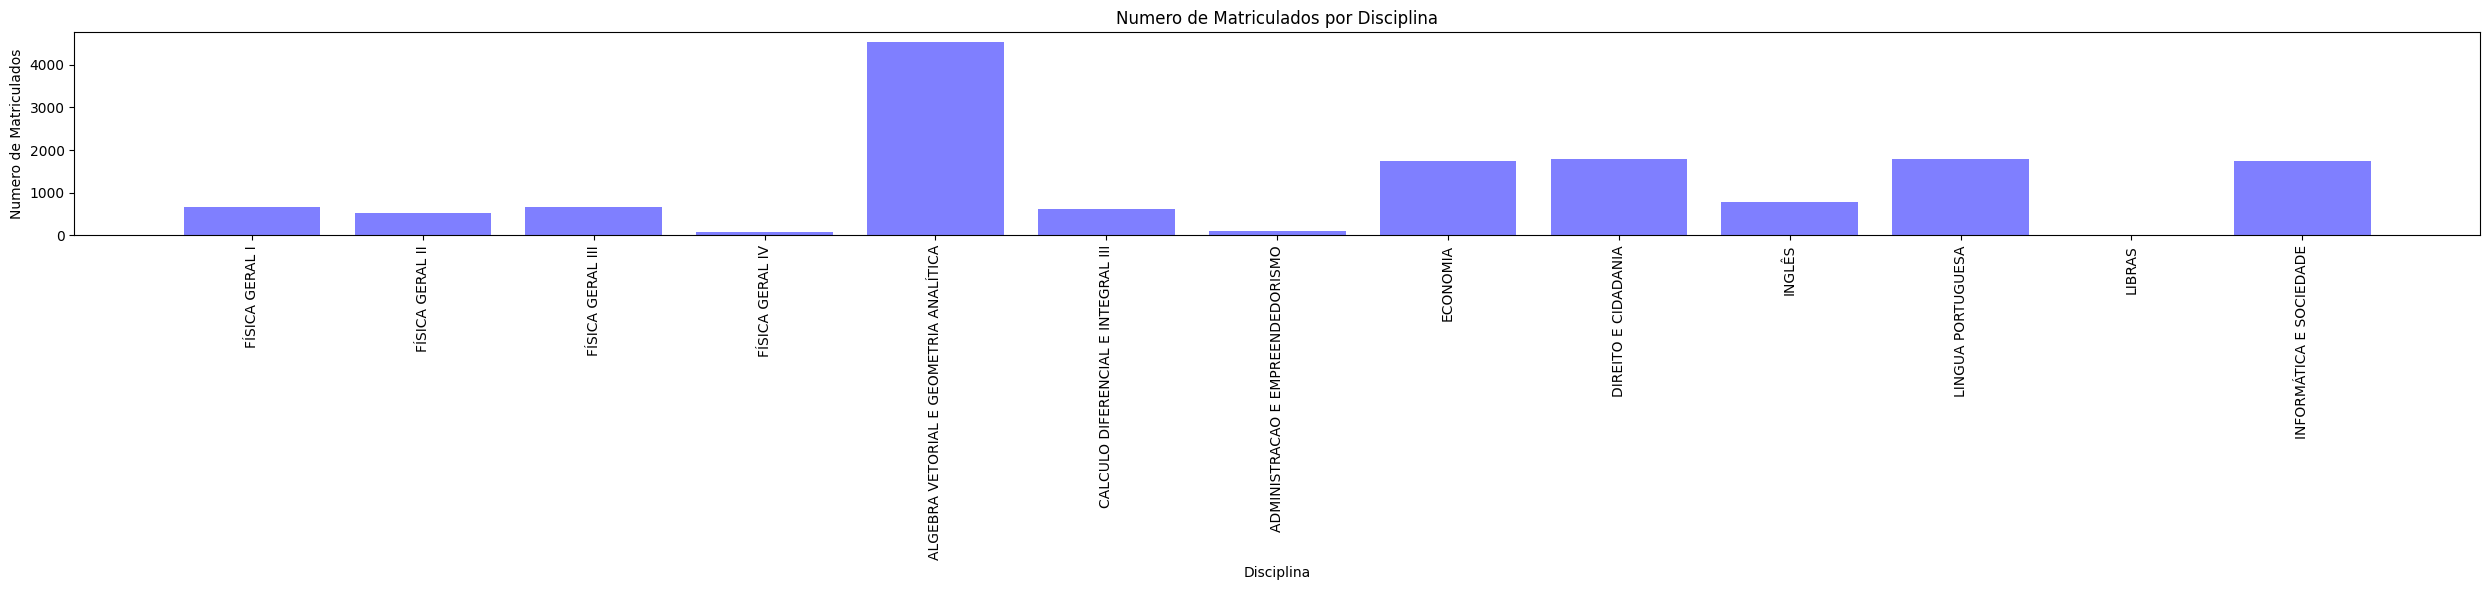

In [ ]:
disciplinas_grafico = list(taxa_aprovacao_dict.keys())
taxa_matricula_grafico = [taxa[0] for taxa in taxa_aprovacao_dict.values()]

#criando grafico de barras
fig, ax1 = plt.subplots(figsize =(25, 6))
plt.bar(disciplinas_grafico, taxa_matricula_grafico, color='b', alpha=0.5)
plt.ylabel('Numero de Matriculados')


#Adicionar rotulos
plt.xticks(rotation=90)
plt.title('Numero de Matriculados por Disciplina')
plt.xlabel('Disciplina')

#exibir o grafico
plt.tight_layout()
plt.show()

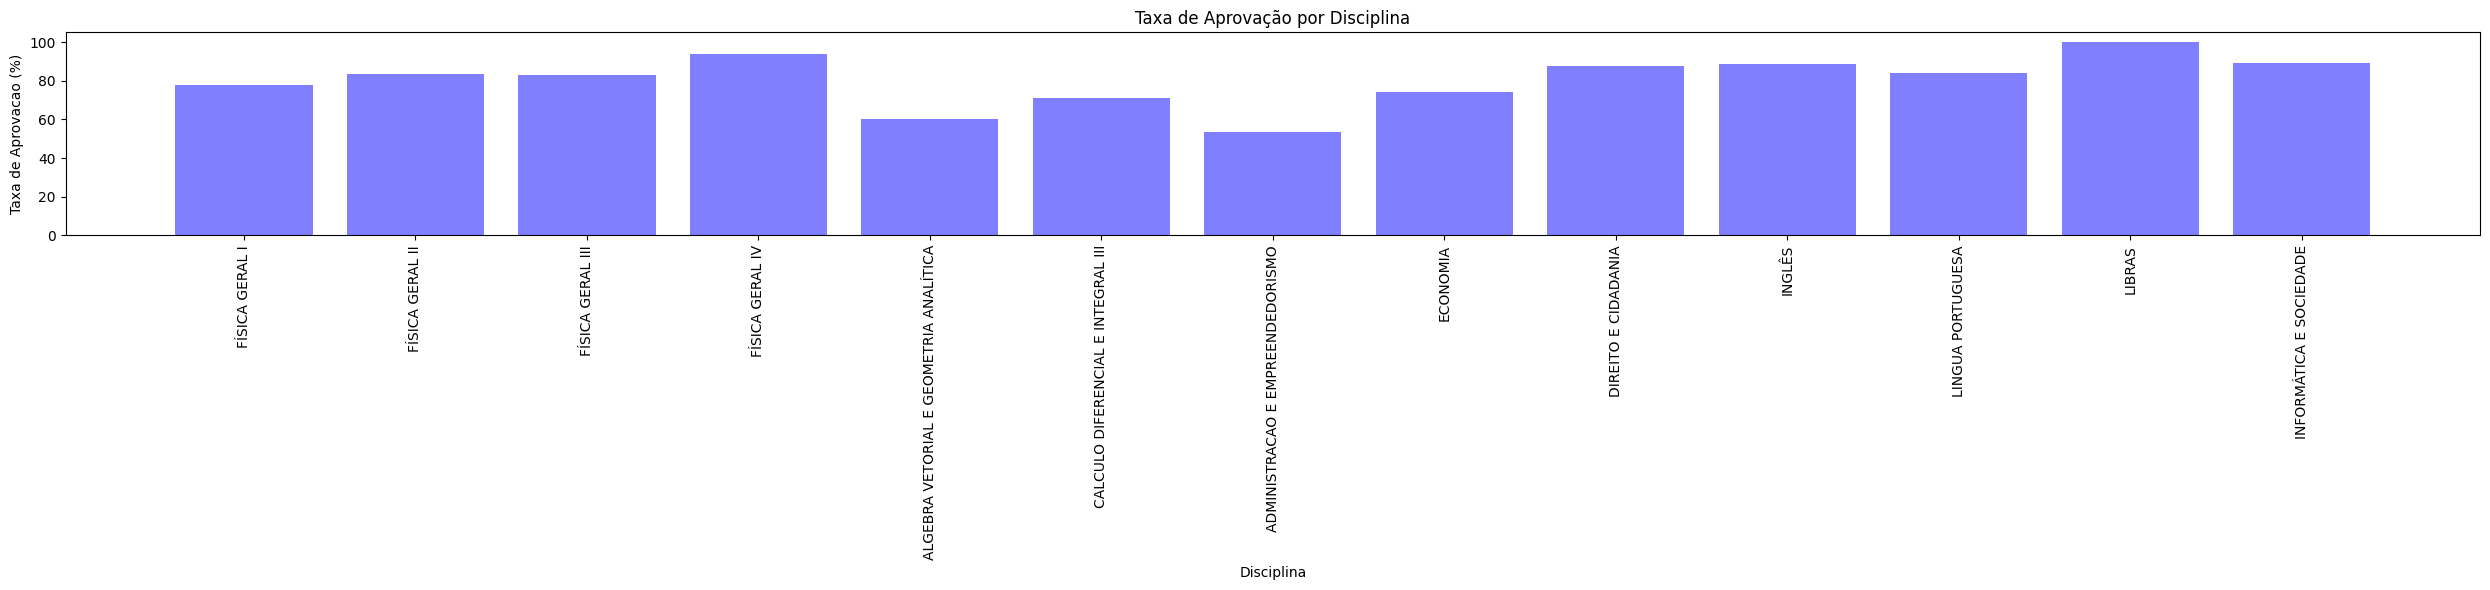

In [ ]:
disciplinas_grafico = list(taxa_aprovacao_dict.keys())
taxa_aprovacao_grafico = [taxa[3] for taxa in taxa_aprovacao_dict.values()]

#criando grafico de barras
fig, ax1 = plt.subplots(figsize =(25, 6))
plt.bar(disciplinas_grafico, taxa_aprovacao_grafico, color='b', alpha=0.5)
plt.ylabel('Taxa de Aprovação (%)')

#plotar o numero de alunos matriculados
ax1.set_ylabel('Taxa de Aprovacao (%)')

#Adicionar rotulos
plt.xticks(rotation=90)
plt.title('Taxa de Aprovação por Disciplina')
plt.xlabel('Disciplina')

#exibir o grafico
plt.tight_layout()
plt.show()

agora um grafico da taxa de reprovacao

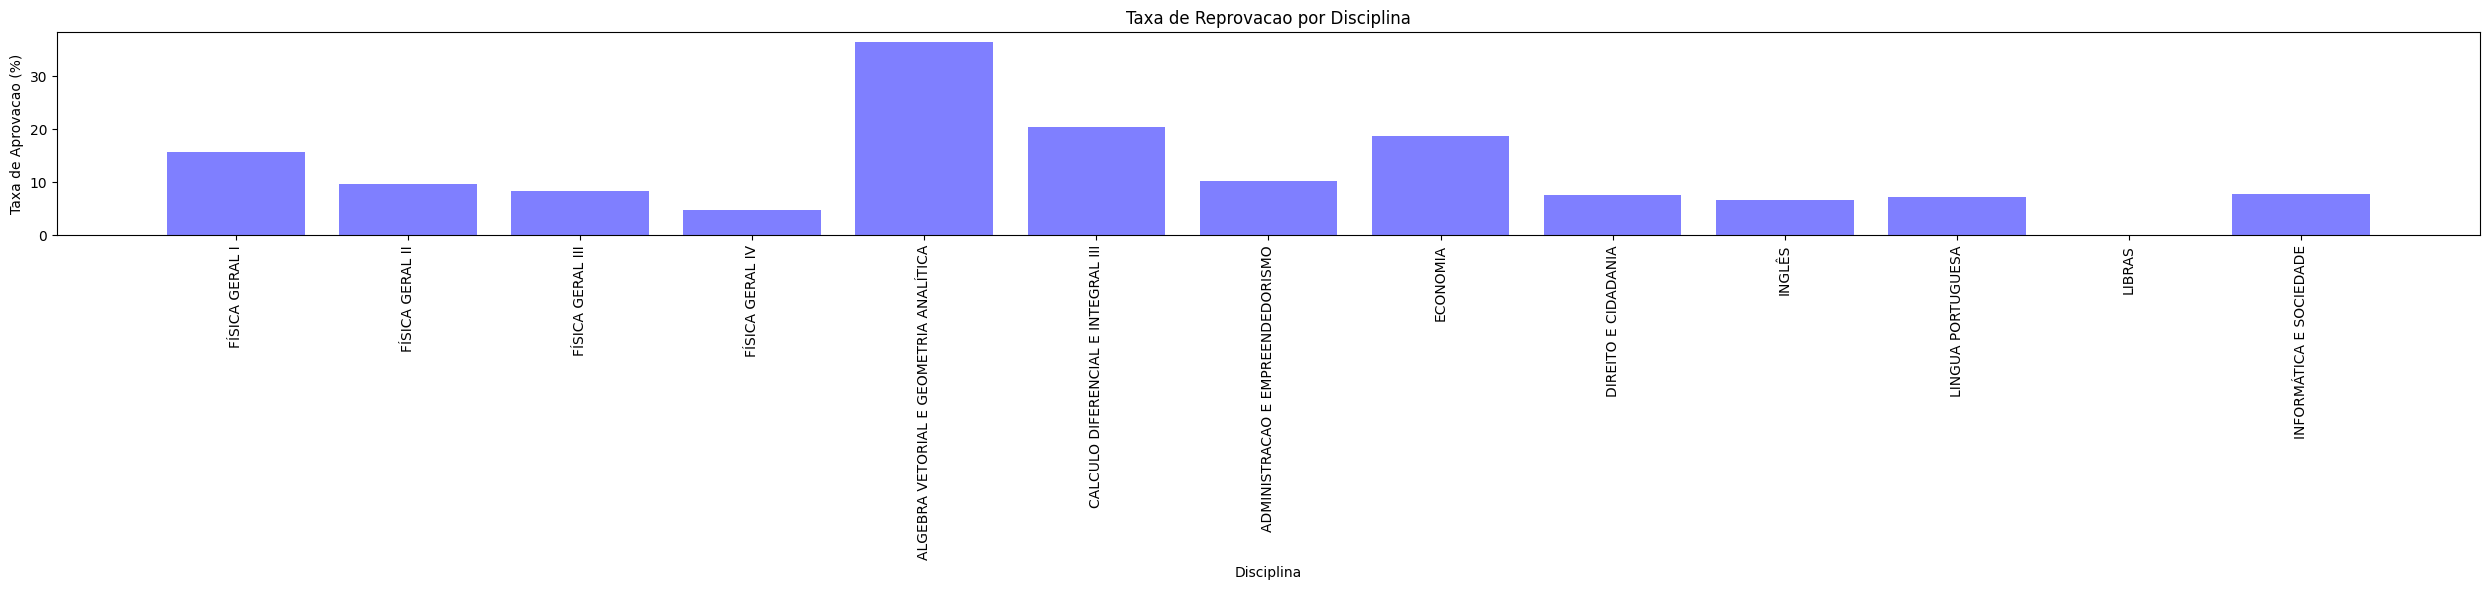

In [ ]:
disciplinas_grafico = list(taxa_aprovacao_dict.keys())
taxa_reprovacao_grafico = [taxa[4] for taxa in taxa_aprovacao_dict.values()]

#criando grafico de barras
fig, ax1 = plt.subplots(figsize =(25, 6))
plt.bar(disciplinas_grafico, taxa_reprovacao_grafico, color='b', alpha=0.5)
plt.ylabel('Taxa de Aprovação (%)')

#plotar o numero de alunos matriculados
ax1.set_ylabel('Taxa de Aprovacao (%)')

#Adicionar rotulos
plt.xticks(rotation=90)
plt.title('Taxa de Reprovacao por Disciplina')
plt.xlabel('Disciplina')

#exibir o grafico
plt.tight_layout()
plt.show()

ACHADOS:
* OPTATIVA GERAL: sao disciplinas que o aluno pode escolher cursar como parte do seu programa academico, sao chamadas de gerais por nao estarem ligadas diretamente ao foco principal do curso. Em CC o aluno precisa pagar no minimo 4 optativas gerais.

CONCLUSAO:
* A disciplina de Algebra Vetorial tem o maior numero de alunos matriculados
* Todas as optativas gerais tem uma taxa de aprovacao maior que 56%
* Algebra Vetorial e Calculo III tem as maiores taxas de reprovacao
* Disciplinas de Linguagens (Lingua Portuguesa, Ingles e Libras) tem baixa taxa de aprovacao